In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import astsadata 
from statsmodels.tsa.stattools import acf, pacf, acovf, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [28]:
df = pd.read_csv('CO2_Monthy.csv')
df.head()

,year,month,decimal date,average,interpolated,trend,ndays,Unnamed: 7
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [4]:
data = df[['year','average']]

In [5]:
df = data

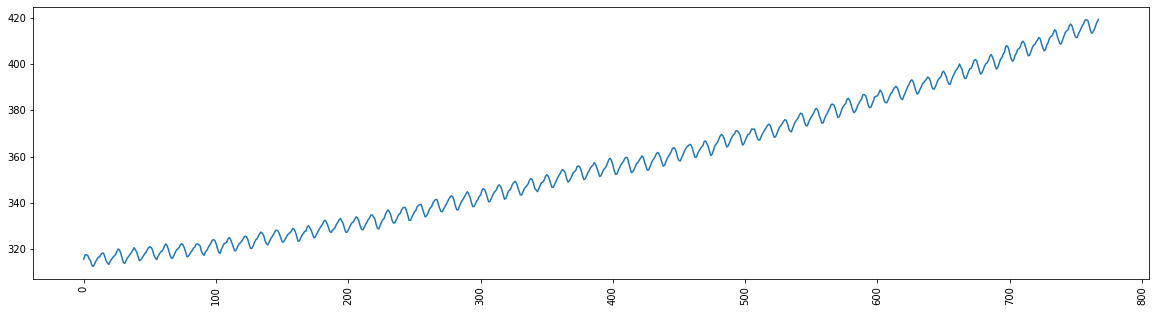

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df.index,df['average'])
plt.xticks(rotation=90)
plt.show()

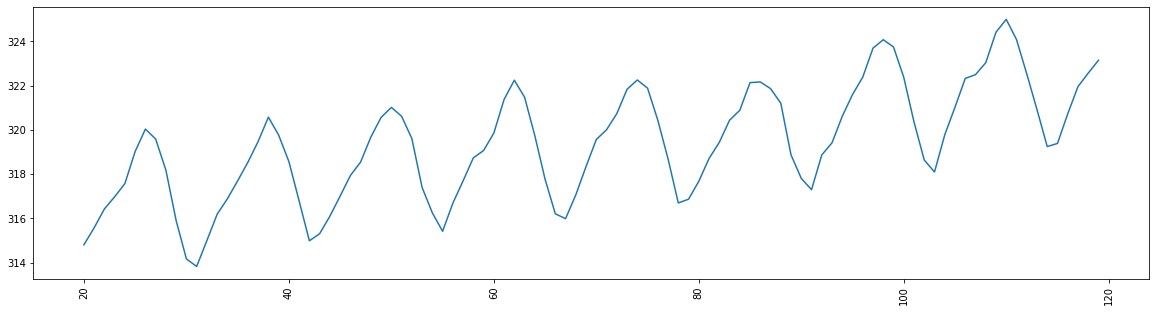

In [7]:
plt.figure(figsize=(20,5))
plt.plot(df.index[20:120],df['average'].values[20:120])
plt.xticks(rotation=90)
plt.show()

In [8]:
s = 12

In [33]:

df['seasonal_diff'] = df['average'].diff(12)

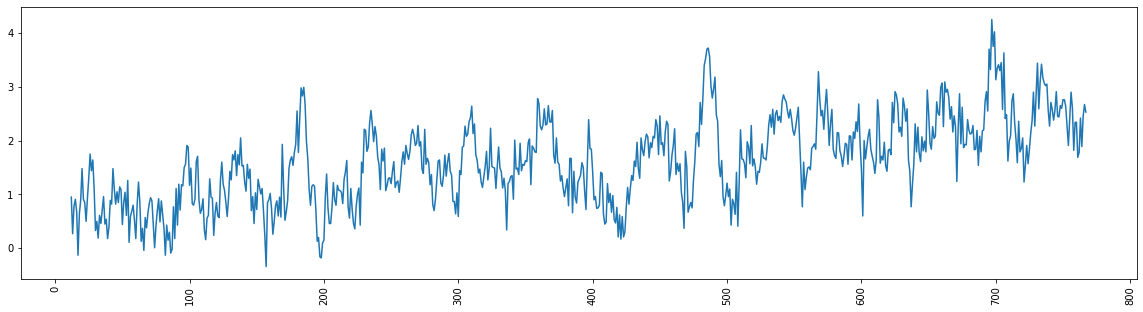

In [34]:
# Plot after removing seasonality
plt.figure(figsize=(20,5))
plt.plot(df.index,df['seasonal_diff'])
plt.xticks(rotation=90)
plt.show()

In [11]:
# Seasonality Differencing D = 1

df['ns_diff'] = df['seasonal_diff'].diff(1)

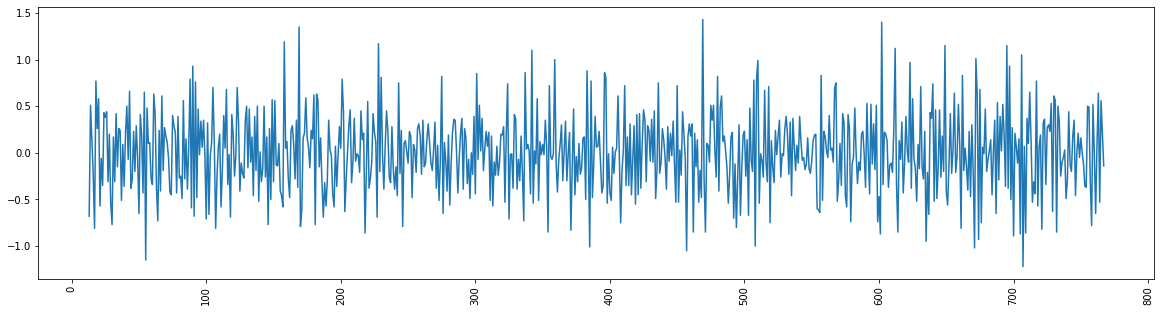

In [12]:
plt.figure(figsize=(20,5))
plt.plot(df.index,df['ns_diff'])
plt.xticks(rotation=90)
plt.show()

This looks stationary . We can apply adf test to check it is indeed stationary

In [13]:
# Plot acf and pacf for milk production data

def plot_acf_and_pacf(data):
    lags = 100
    acf_co2 = acf(data,nlags=lags)
    pacf_co2 = pacf(data,nlags=lags)
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('ACF of CO2 emmision Data ')
    plt.bar(range(lags+1),acf_co2)
    plt.hlines(0.22,-1.0,40,linestyle='dotted')
    plt.hlines(-0.22,-1.0,40,linestyle='dotted',label='significant values bars')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title('PACF of CO2 emmision Data')
    plt.bar(range(lags+1),pacf_co2)
    plt.hlines(0.22,-1.0,40,linestyle='dotted')
    plt.hlines(-0.22,-1.0,40,linestyle='dotted',label='significant values bars')
    
    plt.legend()
    plt.show()    

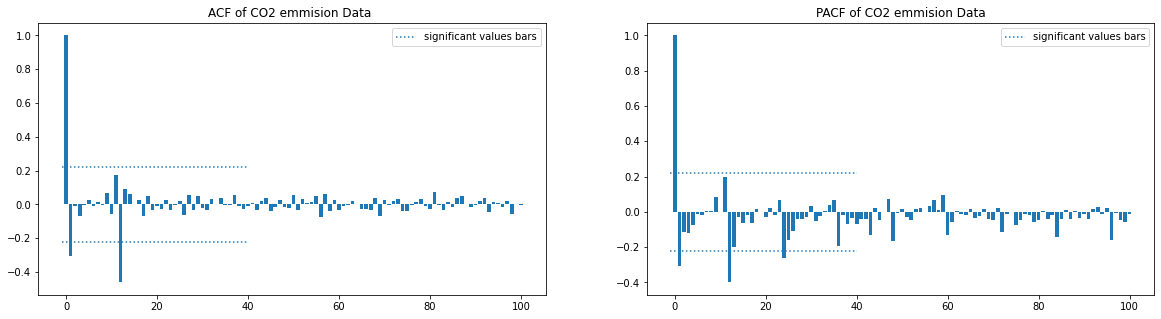

In [14]:
plot_acf_and_pacf(df['ns_diff'][13:])

In [15]:
q = 1 
p = 3

In [16]:
P = 3 
Q = 2

s = 12 

p $\in$ {1,2,3}

q = 1

P  $\in$ {1,2,3}

Q $\in$ {1,2}

d = 1

D = 1

In [17]:
ns_orders = [ (p,1,1) for p in range(1,3)]
seasonal_orders = [ (P,1,Q,12) for p in range(1,3) for q in range(1,3)]

print(ns_orders)
print(seasonal_orders)

[(1, 1, 1), (2, 1, 1)]
[(3, 1, 2, 12), (3, 1, 2, 12), (3, 1, 2, 12), (3, 1, 2, 12)]


In [18]:
fitted_models = []

for s_order in seasonal_orders:
    for ns_order in ns_orders : 
        fitted_models.append(SARIMAX(df['average'],order = ns_order , seasonal_order = s_order))


In [19]:
len(fitted_models)

8

In [20]:
sarima_res = []
i = 0 
for model in fitted_models:
    print(i)
    sarima_res.append(model.fit())
    i+=1

0
1
2
3
4
5
6
7


In [21]:
for model in sarima_res : 
    print (model.aic)

399.3816193625387
400.51836536891767
399.3816193625387
400.51836536891767
399.3816193625387
400.51836536891767
399.3816193625387
400.51836536891767


In [22]:
best_s_order = (1,1,1,12)
best_ns_order = (1,1,1)

In [23]:
best_model = sarima_res[0]

In [24]:
predictions = best_model.predict(start=768, end=868)

In [25]:
# df.append(predictions,ignore_index=True)

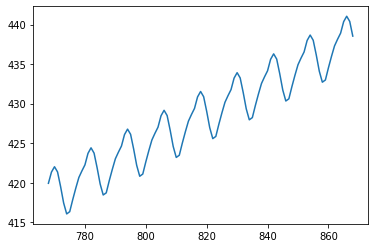

In [26]:
plt.plot(predictions)

**Home Work**

find mistake in this article 

[Time Series Modelling for CO2..](https://towardsdatascience.com/time-series-modeling-for-atmospheric-co2-concentration-ppm-1958-2019-8425fadcb927)